collab


<Figure size 432x288 with 0 Axes>

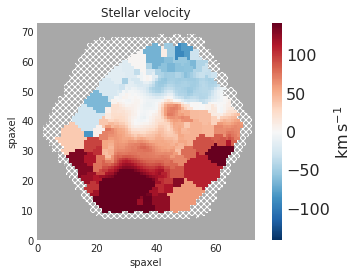

In [99]:
#Step 1: Go to Marvin Github and import some tutorial stuff
from marvin.tools.maps import Maps
import matplotlib.pyplot as plt
import numpy as np
import marvin
from marvin import config, marvindb
config.access = 'collab'
# switch to an MPL
config.setRelease('DR15')
print(config.access)

#config.login()
#print(config.token)

plateids = ['7443-12703']

maps = [Maps(plateid) for plateid in plateids]
#print(Maps('7443-12703').datamodel)
bin_ids = [mapz.get_binid() for mapz in maps]
svel_maps = [mapz['stellar_vel'] for mapz in maps]#emline_gvel
svel_map = svel_maps[0]

plt.clf()
fig, ax = svel_map.plot()
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


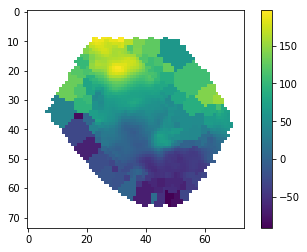

In [94]:
print(svel_map.value)

plt.clf()
plt.imshow(np.ma.masked_where(svel_map.value==0, svel_map.value))
plt.colorbar()
plt.show()

In [95]:
#Open drpall to get all ids
#this is useful: https://sdss-marvin.readthedocs.io/en/stable/tools/catalogues.html#dapall
import pyfits
drpall = pyfits.open('drpall-v2_4_3.fits')#apparently, this is DR15?

all_plateifus = drpall[1].data['PLATEIFU']

#Create a randomized list of plateifus
print(len(all_plateifus))

import random
sampling = random.sample(list(all_plateifus), k=100)
print("sampling with choices", sampling)
#these are somehow not all in DR15 not sure what is going on

11465
sampling with choices ['9292-6103', '8083-6102', '8104-3702', '9883-6102', '9540-3701', '9084-12704', '8604-3701', '8943-12705', '8325-9101', '8997-12701', '9129-12701', '8774-6102', '8702-12701', '8687-6103', '9508-9102', '8893-1901', '8920-12705', '8678-9101', '8996-1901', '9295-12703', '8692-6102', '9018-9101', '9509-9102', '8708-3704', '8936-12701', '8630-9102', '8111-6104', '8250-1901', '8883-6103', '9530-3701', '9680-3701', '8801-12705', '8333-12705', '8452-6103', '8997-9101', '9976-9101', '8322-9101', '8448-12702', '10009-9102', '9071-6104', '8143-12704', '7964-12702', '9692-6101', '9869-12702', '9013-3703', '8668-6101', '9035-6103', '8706-12701', '8442-9102', '8926-12705', '9777-1902', '7443-1901', '8446-12701', '8453-9101', '8035-9102', '8668-12703', '8138-12705', '8155-9101', '9010-3702', '8557-3701', '7995-12704', '8122-1901', '8624-12704', '9730-12702', '8100-9101', '8338-12701', '8440-3703', '8655-9102', '8917-3703', '7998-3704', '9067-6103', '8711-9102', '8581-12703

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: ResourceWarning: unclosed file <_io.FileIO name='drpall-v2_4_3.fits' mode='rb' closefd=True>


MarvinError: found a problem when checking if remote maps exists: Something went wrong on the server side: Failed to retrieve maps 9292-6103: no Maps file found for this combination of parameters.
You can submit this error to Marvin GitHub Issues (https://github.com/sdss/marvin/issues/new).
Fill out a subject and some text describing the error that just occurred.
If able, copy and paste the full traceback information into the issue as well.

In [89]:
print(map_array)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])]


MarvinError: found a problem when checking if remote maps exists: Something went wrong on the server side: Failed to retrieve maps 9292-6103: no Maps file found for this combination of parameters.
You can submit this error to Marvin GitHub Issues (https://github.com/sdss/marvin/issues/new).
Fill out a subject and some text describing the error that just occurred.
If able, copy and paste the full traceback information into the issue as well.

In [118]:
#something is mismatched
from marvin.tools.query import Query

# search for galaxies with an NSA redshift < 0.1
myfilter = 'nsa.z < 0.1'

# create a query
query = Query(search_filter=myfilter)#can make a filter to select a certain subset of galaxies

results = query.run()

print(results)

print(results.count)

plateifu_list=[]
for j in range(results.count):
    plateifu_list.append(results.results[j].plateifu)

#make a list of these plateifus

Marvin Results(query=nsa.z < 0.1, totalcount=4275, count=100, mode=remote)
100


In [119]:
print(plateifu_list)

['8077-6103', '8078-12704', '8077-12705', '8078-1901', '8154-12702', '8078-1902', '9193-1901', '8080-12702', '8080-1902', '9193-12703', '8080-6103', '8081-3703', '8084-12703', '8085-6101', '8082-9102', '8155-3704', '8156-6101', '8618-3701', '7815-9102', '7972-6101', '7972-12703', '7972-3702', '7972-12701', '7972-1901', '7972-12702', '7972-6103', '7815-9101', '7972-12704', '7815-6101', '7972-3701', '7815-12703', '7972-6104', '7972-3704', '7815-12704', '7972-12705', '7815-12702', '7972-6102', '7815-1901', '7815-1902', '7972-9102', '8618-6103', '8618-12701', '7815-3702', '7972-3703', '8618-1902', '7815-12701', '7815-3703', '8618-12704', '8618-6104', '7815-3704', '8618-9102', '8618-3703', '8618-3704', '8618-1901', '8618-12703', '7815-6104', '7975-12705', '7975-3701', '7975-12701', '7975-6101', '7975-12702', '7975-6102', '7975-3702', '7975-1901', '7975-9101', '7975-12703', '7975-1902', '7975-12704', '7975-6104', '7975-9102', '7975-6103', '7975-3703', '7977-3702', '7977-12701', '7977-3704', 

In [159]:
#Here you will assemble a list of the maps of your choice - you could also do this for different
#DAP quantities like other emission lines
#You could also make an array that has multiple maps for each galaxy, but I'll start with one

map_array=[]
map_array_ml = np.zeros((10,74**2))#np.zeros((len(plateifu_list),74**2))
ifu_name=[]
for j in range(len(plateifu_list)):
    #print(plateifu_list[j][-5:-1])
    if plateifu_list[j][-5:-1]=='1270':
        
        map_array.append(Maps(plateifu_list[j])['stellar_vel'].value)
        try:
            map_array_ml[j,:] = np.reshape(Maps(plateifu_list[j])['stellar_vel'].value,(74**2))
        except ValueError:
            continue
        ifu_name.append(plateifu_list[j])
    else:
        continue
    

IndexError: index 12 is out of bounds for axis 0 with size 10

In [160]:
#Now to do some ML things on the maps
print(ifu_name)
print(np.shape(map_array_ml))
%matplotlib inline

['8078-12704', '8077-12705', '8154-12702', '8080-12702', '9193-12703']
(10, 5476)


In [161]:
#Try k-means - this tutorial does the digits - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
from sklearn.cluster import KMeans
print(np.shape(map_array_ml))
#the data needs to be in shape (n_things, x*y), where x and y are the dimensions of each map
#I'm really not sure what to do if the dimensions are different

kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(map_array_ml)
kmeans.cluster_centers_.shape

(10, 5476)


(2, 5476)

ValueError: cannot reshape array of size 10952 into shape (10,74,74)

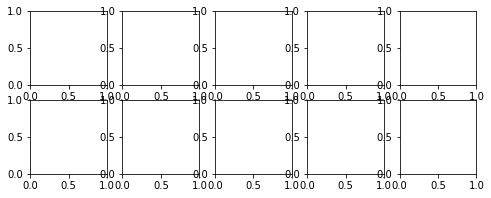

In [163]:
#Visualizing what the heck this actually looks like
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 74, 74)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)